In [ ]:
from main import *
%matplotlib inline


#### Here is the part of the picture we will use to evaluate performance

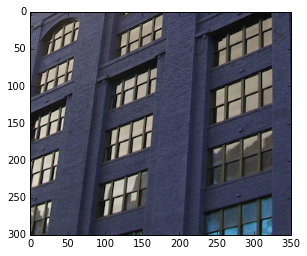

In [2]:
check = cv2.imread('building1.jpg')
init_points = np.asarray([[300, 650], [400, 700]])

plt.imshow(check[init_points[1][0]: init_points[1][1], init_points[0][0]: init_points[0][1], :], cmap = 'gray')
plt.show()



#### Setup
Tollerance and maximum iter will be the same for all tests
In the outer iteration cycle, where we linearize constriants we set
error_tol 1e-6
max_iter 100
In the inner cycle, where we calculate matrix decompositions we set
error_tol = 1e-4
max_iter 100

Note that we set inner cycle tollerance larger than outer cycle tollerance, in this case we will unlikely brake out of the outer cycle by tollerance, but we will plot outer cycle tollerance on each step, so we will see if we are in the minimum

#### First experiment 
First we run the test with blur, pyramid and branch-and-bound turned off


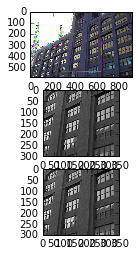

CPU times: user 12min 29s, sys: 9.99 s, total: 12min 39s
Wall time: 3min 9s


In [36]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = TILT(check, \
                                                                                         'homography',\
                                                                                         init_points,\
                                                                                         inner_max_iter=100,\
                                                                                         outer_max_iter=100,\
                                                                                         outer_tol = 1e-6,\
                                                                                         blur=0,\
                                                                                         pyramid=0,\
                                                                                         branch=0)

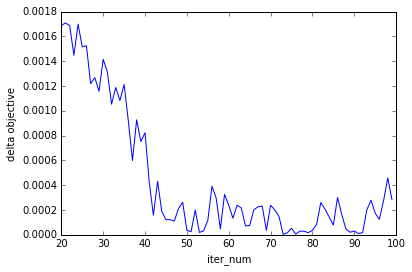

In [63]:
plt.plot(np.arange(20,100), data['no_opt'][0][20:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

As one can see it takes enourmouse time, and we converge in local optimum! 

#### Second experiment
Now we turn the blur on and see what happens

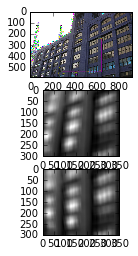

CPU times: user 14min 12s, sys: 11.8 s, total: 14min 24s
Wall time: 3min 36s


In [41]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = TILT(check, \
                                                                                         'homography',\
                                                                                         init_points,\
                                                                                         inner_max_iter=100,\
                                                                                         outer_max_iter=100,\
                                                                                         outer_tol = 1e-6,\
                                                                                         blur=1,\
                                                                                         pyramid=0,\
                                                                                         branch=0)

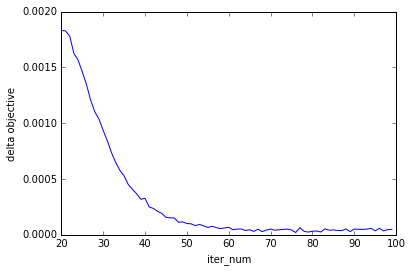

In [62]:
plt.plot(np.arange(20,100), data['only_blur'][0][20:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

It almoust the same time consuming, but we can see that the verticals on the image became verticals. This means that the nearest local minimum is in the better point for blured image. The convergence goes the same way, it take around 60 outer iterations.

#### Third experiment 
We now set the pyramid on

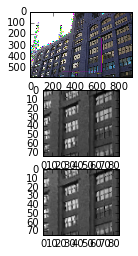

CPU times: user 1min 6s, sys: 1.23 s, total: 1min 7s
Wall time: 17.1 s


In [44]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = TILT(check, \
                                                                                         'homography',\
                                                                                         init_points,\
                                                                                         inner_max_iter=100,\
                                                                                         outer_max_iter=100,\
                                                                                         outer_tol = 1e-6,\
                                                                                         blur=1,\
                                                                                         pyramid=1,\
                                                                                         branch=0)

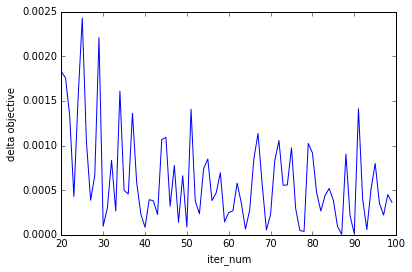

In [64]:
plt.plot(np.arange(20,100), data['blur+pyramid'][0][20:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

What we see now is that the time decreased more than in 10 times. And we converge to local optimum in less than 20 iterations. In fact we converge in local optimum on the first few iterations, because we started from transformation, which was found for the same image which size was decreased in 4 times.

#### Fourth experiment 
Now we add branch-and-bound

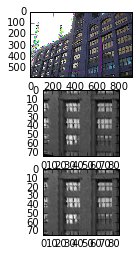

CPU times: user 1min 10s, sys: 1.33 s, total: 1min 11s
Wall time: 18.1 s


In [46]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = TILT(check, \
                                                                                         'homography',\
                                                                                         init_points,\
                                                                                         inner_max_iter=100,\
                                                                                         outer_max_iter=100,\
                                                                                         outer_tol = 1e-6,\
                                                                                         blur=1,\
                                                                                         pyramid=1,\
                                                                                         branch=1)

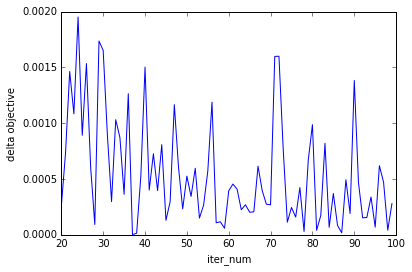

In [65]:
plt.plot(np.arange(20,100), data['blur+pyramid+bb'][0][20:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

Here we see global optimum which we expected, and time spent is almoust the same as for pyramid

#### N-th expiriment

If we set outer_tollerance to $5*$inner_tollerance, and turn all the euristics on, we get the convergence on the first step, and time taken decreases twice

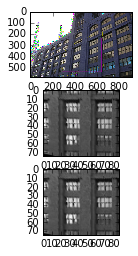

CPU times: user 23.1 s, sys: 412 ms, total: 23.5 s
Wall time: 6.07 s


In [75]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = \
TILT(check, 'homography',init_points,inner_max_iter=100,outer_max_iter=100,inner_tol = 1e-5,outer_tol = 5e-5,blur=1,pyramid=1,branch=1)

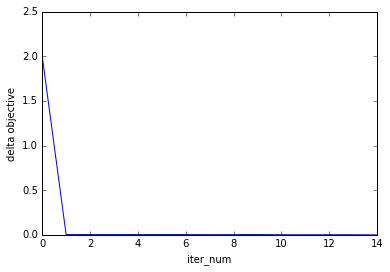

In [76]:
plt.plot(error)
plt.ylabel('delta objective')
plt.xlabel('iter_num')

#### N+1-th experiment

Now we leave the errors like in previous and turn off pyramid and blur

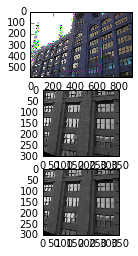

CPU times: user 12min 48s, sys: 10.5 s, total: 12min 59s
Wall time: 3min 14s


In [77]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = \
TILT(check, 'homography',init_points,inner_max_iter=100,outer_max_iter=100,inner_tol = 1e-5,outer_tol = 5e-5,blur=0,pyramid=0,branch=1)

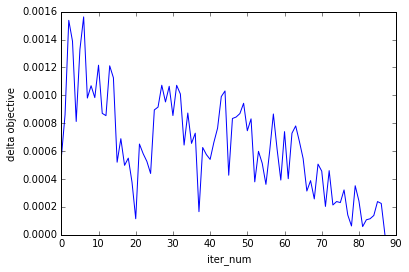

In [80]:
plt.plot(error[1:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

We see extreme time growth, but what's more important we are in the local optimum again

#### N+2-th experiment
To get back to the global optimum we can try to add blur

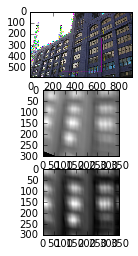

CPU times: user 17min 7s, sys: 13.5 s, total: 17min 21s
Wall time: 4min 20s


In [81]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = \
TILT(check, 'homography',init_points,inner_max_iter=100,outer_max_iter=100,inner_tol = 1e-5,outer_tol = 5e-5,blur=1,pyramid=0,branch=1)

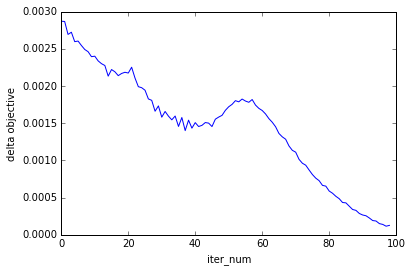

In [82]:
plt.plot(error[1:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

Yes! Global optimum on the last picture. 

#### N+3-th Experiment
We try pyramid + branch and bound configuration

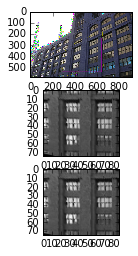

CPU times: user 22.4 s, sys: 500 ms, total: 22.9 s
Wall time: 5.89 s


In [83]:
%time Ds, Dotau, A, E, tfm_matrix, UData, VData, XData, YData, error, outer_round = \
TILT(check, 'homography',init_points,inner_max_iter=100,outer_max_iter=100,inner_tol = 1e-5,outer_tol = 5e-5,blur=0,pyramid=1,branch=1)

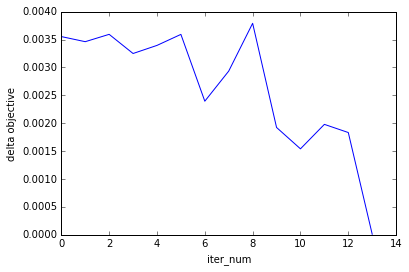

In [84]:
plt.plot(error[1:])
plt.ylabel('delta objective')
plt.xlabel('iter_num')

Perfect, fast global minimum. This is what we sometimes can expect, because smaller picture actually looks like blured large.

#### Summary

$$\begin{array}{ccccc}
Blur & Pyramid & B\&B & Minimum & Time\\
off & off & off & Local & Huge\\
on & off & off & Better\ Local & Huge\\
on & on & off & Better\ Local & Small\\
on & on & on & Global & Small\\
off & off & on & Local & Huge\\
on & off & on & Global & Small\\
off & on & on & Global & Small
\end{array}$$
 